# Formatação de Gráficos

## Sobre os Dados
Neste notebook, estaremos trabalhando com 2 conjuntos de dados:
- Preço das ações do Facebook ao longo de 2018 (obtido usando o pacote [`stock_analysis`](https://github.com/stefmolin/stock-analysis))
- Conjunto de dados do Centro Europeu de Prevenção e Controle de Doenças (ECDC) sobre o número diário de novos casos relatados de COVID-19 por país em todo o mundo, coletado em 19 de setembro de 2020 via [este link](https://opendata.ecdc.europa.eu/covid19/casedistribution/csv)

## Configuração

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

## Títulos e Rótulos dos Eixos

- `plt.suptitle()` adiciona um título aos gráficos e subgráficos.
- `plt.title()` adiciona um título a um único gráfico. Se você estiver usando subgráficos, ele colocará o título apenas no último subgráfico, então você precisará usar `plt.suptitle()`.
- `plt.xlabel()` rotula o eixo x.
- `plt.ylabel()` rotula o eixo y.

Text(0, 0.5, 'price ($)')

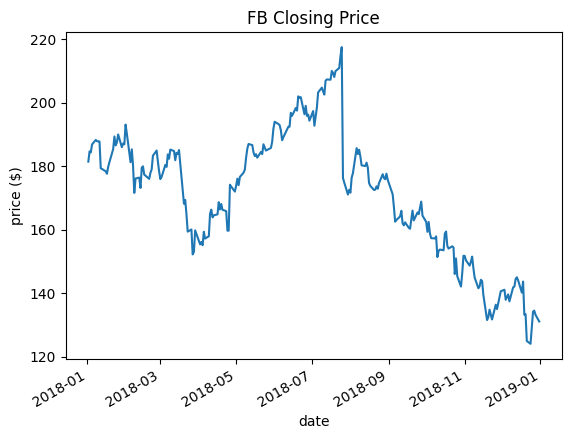

In [5]:
fb.close.plot()
plt.title('FB Closing Price')
plt.xlabel('date')
plt.ylabel('price ($)')

### `plt.suptitle()` vs. `plt.title()`

Veja o que acontece quando chamamos `plt.title()` com subplots (e também `plt.ylabel()`:

Text(0, 0.5, 'price ($)')

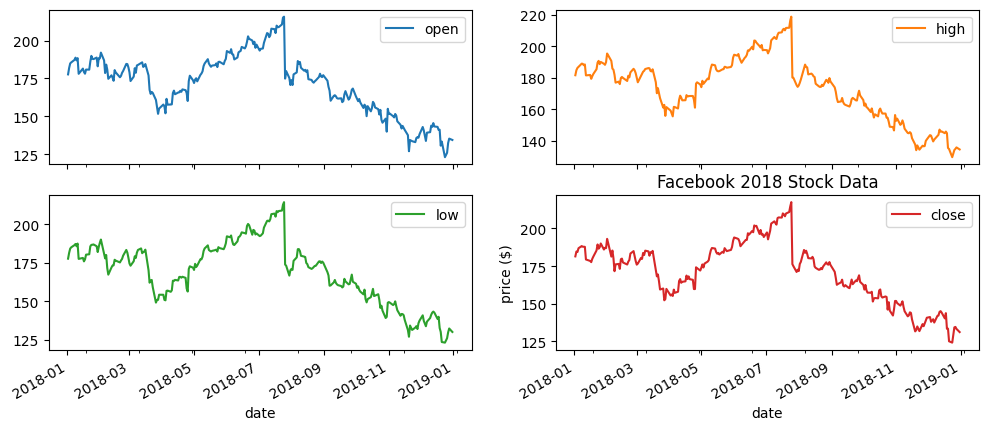

In [4]:
fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.title('Facebook 2018 Stock Data')
plt.ylabel('price ($)')

Usar `plt.suptitle()` dará um título para a figura; para os rótulos do eixo y, precisamos usar diretamente os objetos `Axes`:

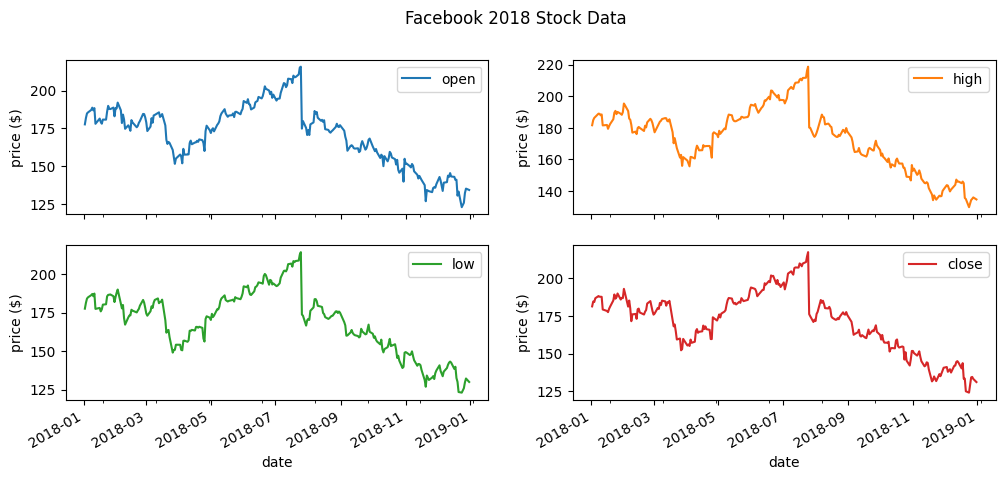

In [6]:
axes = fb.iloc[:, :4].plot(subplots=True, layout=(2, 2), figsize=(12, 5))
plt.suptitle('Facebook 2018 Stock Data')
for ax in axes.flatten():
    ax.set_ylabel('price ($)')

## Legendas

O Matplotlib possibilita controlar muitos aspectos da aparência e localização da legenda. Aqui está uma amostra dos parâmetros comumente utilizados, que veremos ao longo do livro:

| Parâmetro | Propósito |
| --- | --- |
| `loc` | Especifica a localização da legenda |
| `bbox_to_anchor` | Usado em conjunto com `loc` para especificar a localização da legenda |
| `ncol` | Define o número de colunas em que os rótulos serão quebrados, o padrão é 1 |
| `framealpha` | Controla a transparência do fundo da legenda |
| `title` | Adiciona um título à legenda |

`plt.legend()` adiciona uma legenda ao gráfico. Podemos especificar onde colocá-la usando o parâmetro `loc`:

Text(0, 0.5, 'price ($)')

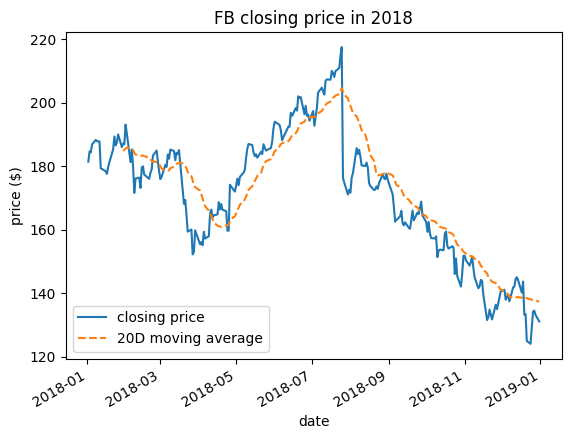

In [7]:
fb.assign(
    ma=lambda x: x.close.rolling(20).mean()
).plot(
    y=['close', 'ma'],
    title='FB closing price in 2018',
    label=['closing price', '20D moving average'],
    style=['-', '--']
)
plt.legend(loc='lower left')
plt.ylabel('price ($)')

Por padrão, o `matplotlib` tenta encontrar a melhor localização para a legenda, mas podemos substituí-la conforme necessário. Aqui estão as localizações gerais disponíveis, mas observe que você sempre pode fornecer uma tupla `(x, y)` para indicar onde colocar a legenda:

| Localização String | Código de Localização |
| --- | --- |
| `'best'` | `0` |
| `'upper right'` | `1` |
| `'upper left'` | `2` |
| `'lower left'` | `3` |
| `'lower right'` | `4` |
| `'right'` | `5` |
| `'center left'` | `6` |
| `'center right'` | `7` |
| `'lower center'` | `8` |
| `'upper center'` | `9` |
| `'center'` | `10` |

Note que também há um método `legend()` nos objetos `Axes`. Vamos usá-lo junto com os argumentos `framealpha` e `ncol` para estilizar uma legenda. Vamos analisar a porcentagem de novos casos de COVID-19 no mundo que ocorreram no Brasil, China, Índia, Itália, Espanha e EUA durante o período de 8 meses de 18 de janeiro de 2020 a 18 de setembro de 2020:

Text(0, 0.5, "percentage of the world's COVID-19 cases")

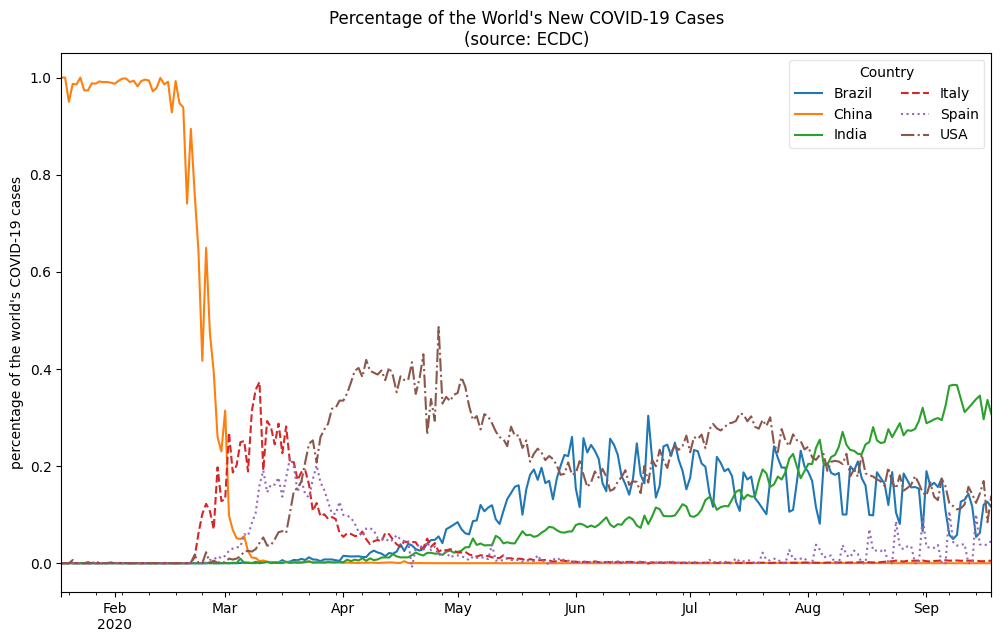

In [11]:
new_cases = covid.reset_index().pivot(
    index='date', columns='countriesAndTerritories', values='cases'
).fillna(0)

pct_new_cases = new_cases.apply(lambda x: x / new_cases.apply('sum', axis=1), axis=0)[
    ['Italy', 'China', 'Spain', 'USA', 'India', 'Brazil']
].sort_index(axis=1).fillna(0)

ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)

ax.legend(title='Country', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')

## Formatação dos Eixos

### Especificando limites dos eixos
`plt.xlim()`/`plt.ylim()` e `Axes.set_xlim()`/`Axes.set_ylim()` podem ser usados para especificar os valores mínimos e máximos para o eixo. Passar `None` fará com que o `matplotlib` determine o limite.

(0.0, 1.0504480725965588)

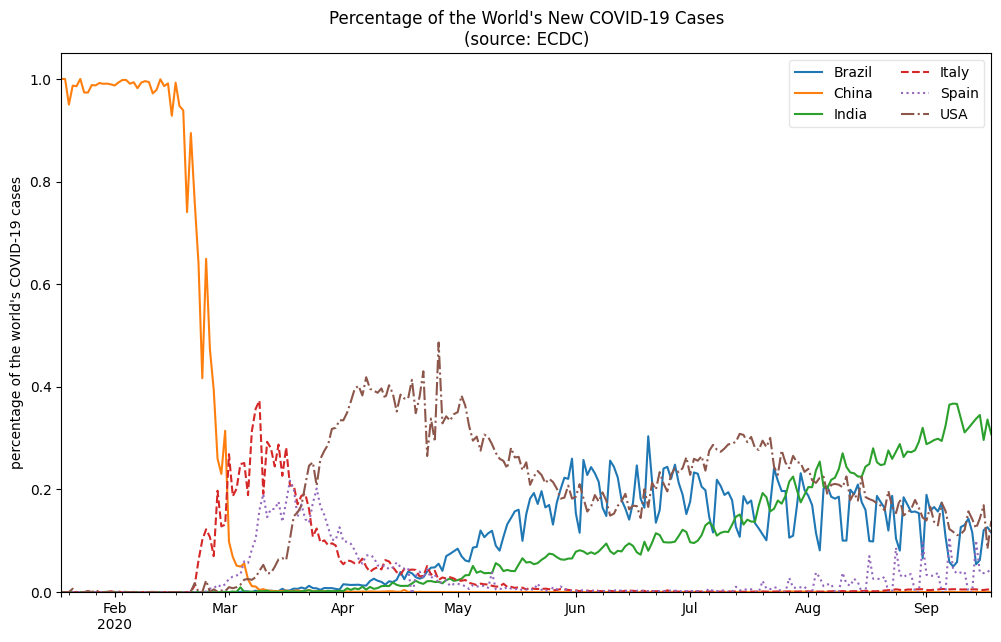

In [13]:
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)

ax.legend(framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)

### Formatando os Ticks dos Eixos

Podemos usar `plt.xticks()` e `plt.yticks()` para fornecer rótulos de ticks e especificar quais ticks mostrar. Aqui, mostramos todos os meses no mesmo dia do mês (dia 18):

(0.0, 1.0504480725965588)

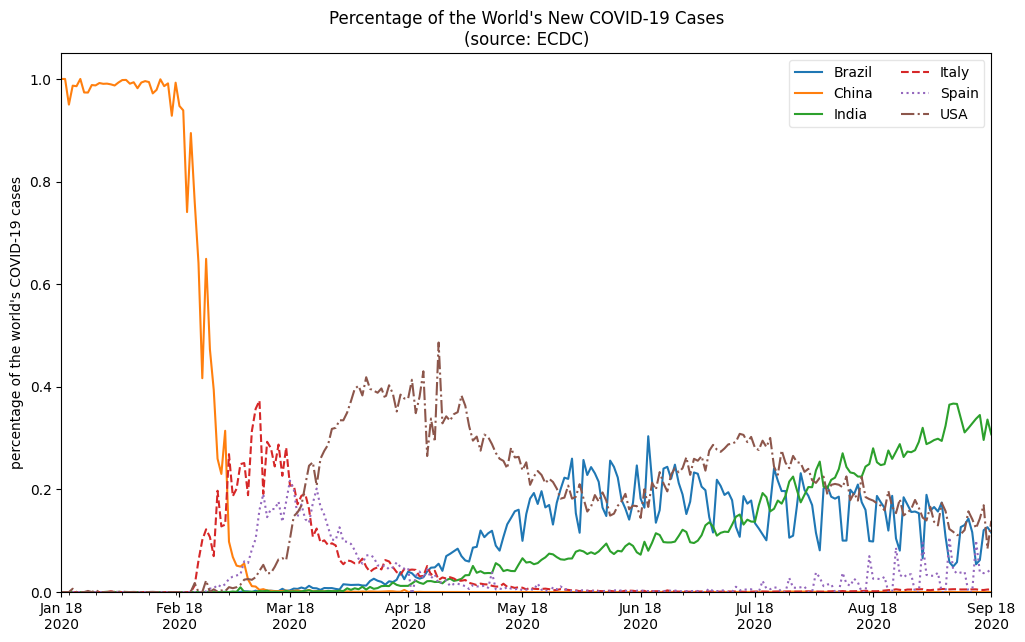

In [14]:
ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)

#### O módulo `matplotlib.ticker`
##### `PercentFormatter`
Podemos usar a classe `PercentFormatter` para exibir os rótulos dos ticks como porcentagens. Podemos especificar o denominador (`xmax`) a ser usado ao calcular as porcentagens. Isso é passado para o método `set_major_formatter()` do `xaxis` ou `yaxis` no `Axes`.

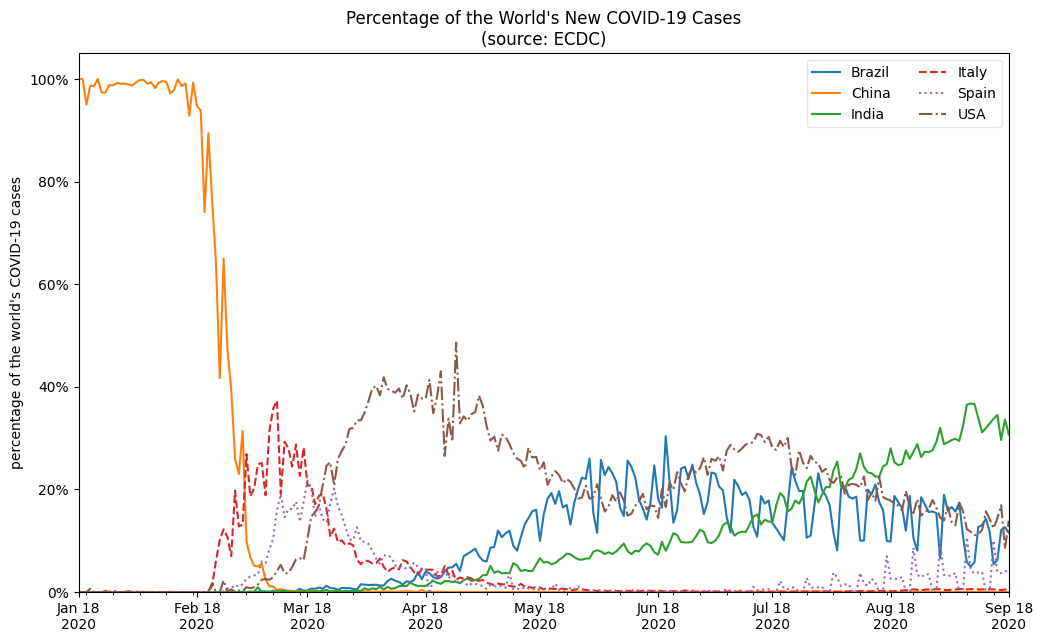

In [17]:
from matplotlib.ticker import PercentFormatter

ax = pct_new_cases.plot(
    figsize=(12, 7), style=['-'] * 3 + ['--', ':', '-.'],
    title='Percentage of the World\'s New COVID-19 Cases\n(source: ECDC)'
)

tick_locs = covid.index[covid.index.day == 18].unique()
tick_labels = [loc.strftime('%b %d\n%Y') for loc in tick_locs]
plt.xticks(tick_locs, tick_labels)

ax.legend(title='', framealpha=0.5, ncol=2)
ax.set_xlabel('')
ax.set_ylabel('percentage of the world\'s COVID-19 cases')
ax.set_ylim(0, None)
ax.yaxis.set_major_formatter(PercentFormatter(xmax=1))

##### `EngFormatter`

Podemos usar a classe `EngFormatter` para aplicar a notação de engenharia aos ticks.

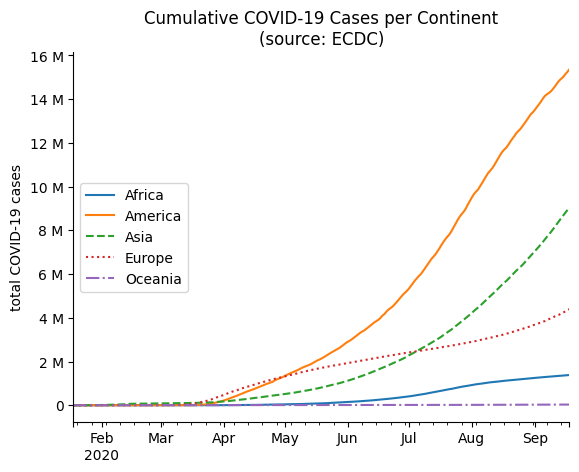

In [18]:
from matplotlib.ticker import EngFormatter

ax = covid.query('continentExp != "Other"').groupby([
    'continentExp', pd.Grouper(freq='1D')
]).cases.sum().unstack(0).apply('cumsum').plot(
    style=['-', '-', '--', ':', '-.'],
    title='Cumulative COVID-19 Cases per Continent\n(source: ECDC)'
)

ax.legend(title='', loc='center left')
ax.set(xlabel='', ylabel='total COVID-19 cases')
ax.yaxis.set_major_formatter(EngFormatter())

for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

<hr>
<div>
    <a href="./1-introduction_to_seaborn.ipynb">
        <button>&#8592; Previous Notebook</button>
    </a>
    <a href="./3-customizing_visualizations.ipynb">
        <button style="float: right;">Next Notebook &#8594;</button>
    </a>
</div>
<hr>